In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
import pandas as pd
import numpy as np

In [5]:
phrases = [
    "I am going to have a pizza delivered for dinner.",
    "I am going to try that new French restaurant for dinner.",
    "I prefer reading over going to the movies.",
    "I prefer going to the moviees over reading books.",
    "I have friends in New York City.",
    "She loves going to the movies."
]

In [8]:
#Features Vectors
#min_df = 1 is the threshold for ignoring terms
vector =  TfidfVectorizer(min_df = 1)
tfidf  = vector.fit_transform(phrases)#cutoff by default is 1

In [9]:
#cosine similarity
cosineSimilarity = (tfidf * tfidf.T).A

In [10]:
print(cosineSimilarity)

[[ 1.          0.414471    0.1196096   0.1025873   0.12736866  0.11989019]
 [ 0.414471    1.          0.1016883   0.08721648  0.10828481  0.10192685]
 [ 0.1196096   0.1016883   1.          0.70155695  0.          0.45496329]
 [ 0.1025873   0.08721648  0.70155695  1.          0.          0.23372112]
 [ 0.12736866  0.10828481  0.          0.          1.          0.        ]
 [ 0.11989019  0.10192685  0.45496329  0.23372112  0.          1.        ]]


In [12]:
#cleaning the cosine similarity visually
df = pd.DataFrame(cosineSimilarity, index=phrases, columns=phrases)

In [13]:
df

,I am going to have a pizza delivered for dinner.,I am going to try that new French restaurant for dinner.,I prefer reading over going to the movies.,I prefer going to the moviees over reading books.,I have friends in New York City.,She loves going to the movies.
I am going to have a pizza delivered for dinner.,1.000000,0.414471,0.119610,0.102587,0.127369,0.119890
I am going to try that new French restaurant for dinner.,0.414471,1.000000,0.101688,0.087216,0.108285,0.101927
I prefer reading over going to the movies.,0.119610,0.101688,1.000000,0.701557,0.000000,0.454963
I prefer going to the moviees over reading books.,0.102587,0.087216,0.701557,1.000000,0.000000,0.233721
I have friends in New York City.,0.127369,0.108285,0.000000,0.000000,1.000000,0.000000
She loves going to the movies.,0.119890,0.101927,0.454963,0.233721,0.000000,1.000000


In [17]:
import seaborn as sns #for visual representation
%matplotlib inline

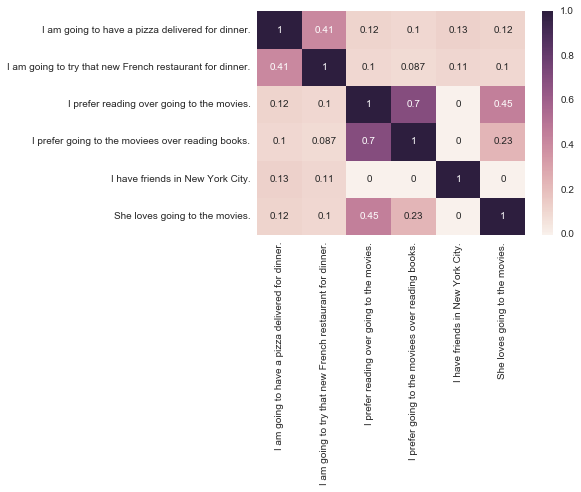

In [18]:
sns.heatmap(df, annot=True)

In [19]:
#TFIDF on a set a documents
from sklearn.decomposition import NMF

In [51]:
d1 = open('tfidf_1.txt', encoding="utf-8").read()
d2 = open('tfidf_2.txt', encoding="utf-8").read()
d3 = open('tfidf_3.txt', encoding="utf-8").read()
d4 = open('tfidf_4.txt', encoding="utf-8").read()
d5 = open('tfidf_5.txt', encoding="utf-8").read()
d6 = open('tfidf_6.txt', encoding="utf-8").read()
d7 = open('tfidf_7.txt', encoding="utf-8").read()
d8 = open('tfidf_8.txt', encoding="utf-8").read()
d9 = open('tfidf_9.txt', encoding="utf-8").read()
d10 = open('tfidf_10.txt', encoding="utf-8").read()


In [62]:
dataset = [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10]

In [79]:
vectorizer = TfidfVectorizer(min_df = 1, max_features = 100, stop_words = "english")

In [80]:
tfidf = vectorizer.fit_transform(dataset)

In [81]:
nmf = NMF(n_components = 10, random_state = 1).fit(tfidf)#n_components refers to the number of topics we want returned for each document

In [82]:
featureNames = vectorizer.get_feature_names()

In [83]:
for topic_idx, topic in enumerate(nmf.components_): #underscore suffixed variable is usually to avoid conflicts with python keywords 
    print("Topic #%d:" % topic_idx)
    print(" ".join([featureNames[i]
                    for i in topic.argsort()[:-11 - 1:-1]]))
    print("\n")

Topic #0:
revolution french revolutionary napoleon political directory popular modern republic 1789 military


Topic #1:
tesla electrical wireless work york popular new power american series time


Topic #2:
newton work earth day time later president church european revolution widely


Topic #3:
leonardo man time later widely world life history april called scientific


Topic #4:
lunar module armstrong apollo earth landed command july 11 man later


Topic #5:
rockefeller oil church life american modern man national scientific supported central


Topic #6:
war soviet union axis germany japan allies united invasion 1945 pacific


Topic #7:
titanic ship passengers safety april new wireless world led people life


Topic #8:
washington american president british continental national army united states war government


Topic #9:
napoleon french coalition europe france battle empire military army allies revolution


